In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
data = pd.read_csv('icml_face.csv')
data.columns = ['emotion', 'Usage', 'pixels']
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
data.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [4]:
def prepare_data(data):
    image_array = np.zeros(shape=(len(data), 48, 48, 1))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48)) 
        image_array[i, :, :, 0] = image / 255

    return image_array, image_label



def plot_examples(label):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[label])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

        
        
def plot_all_emotions():
    N_train = train_labels.shape[0]

    sel = np.random.choice(range(N_train), replace=False, size=16)

    X_sel = train_images[sel, :, :, :]
    y_sel = train_labels[sel]

    plt.figure(figsize=[12,12])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_sel[i,:,:,0], cmap='binary_r')
        plt.title(emotions[y_sel[i]])
        plt.axis('off')
    plt.show()
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    

    
def vis_training(hlist, start=1):
    
    loss = np.concatenate([h.history['loss'] for h in hlist])
    val_loss = np.concatenate([h.history['val_loss'] for h in hlist])
    acc = np.concatenate([h.history['accuracy'] for h in hlist])
    val_acc = np.concatenate([h.history['val_accuracy'] for h in hlist])
    
    epoch_range = range(1,len(loss)+1)

    plt.figure(figsize=[12,6])
    plt.subplot(1,2,1)
    plt.plot(epoch_range[start-1:], loss[start-1:], label='Training Loss')
    plt.plot(epoch_range[start-1:], val_loss[start-1:], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epoch_range[start-1:], acc[start-1:], label='Training Accuracy')
    plt.plot(epoch_range[start-1:], val_acc[start-1:], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

In [5]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [6]:
full_train_images, full_train_labels = prepare_data(data[data['Usage']=='Training'])
test_images, test_labels = prepare_data(data[data['Usage']!='Training'])

# full_train_images = full_train_images[0:2000]
# full_train_labels = full_train_labels[0:2000]

# test_images = test_images[0:500]
# test_labels = test_labels[0:500]
print(full_train_images.shape)
print(full_train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(28709, 48, 48, 1)
(28709,)
(7178, 48, 48, 1)
(7178,)


In [7]:
train_images, valid_images, train_labels, valid_labels =\
    train_test_split(full_train_images, full_train_labels, test_size=0.2, random_state=1)

print(train_images.shape)
print(valid_images.shape)
print(train_labels.shape)
print(valid_labels.shape)

(22967, 48, 48, 1)
(5742, 48, 48, 1)
(22967,)
(5742,)


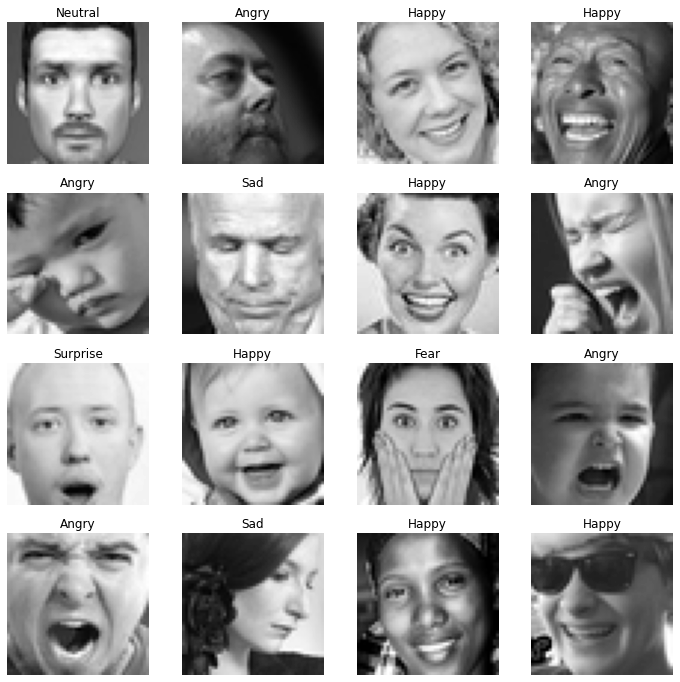

In [8]:
plot_all_emotions()

In [11]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(keras.layers.Conv2D(filters=10, kernel_size=(3, 3)))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=10, kernel_size=(3, 3)))
model.add(keras.layers.MaxPooling2D())


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=120, activation='relu'))

model.add(keras.layers.Dense(units=84, activation='relu'))

model.add(keras.layers.Dense(units=7, activation = 'softmax'))

In [12]:
X_train = np.array(train_images)
y_train = np.array(train_labels)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=30)

Epoch 1/30
718/718 [==============================] - 40s 56ms/step - loss: 1.6138 - accuracy: 0.3654
Epoch 2/30
718/718 [==============================] - 37s 51ms/step - loss: 1.4001 - accuracy: 0.4560
Epoch 3/30
718/718 [==============================] - 37s 52ms/step - loss: 1.2520 - accuracy: 0.5180
Epoch 4/30
718/718 [==============================] - 37s 52ms/step - loss: 1.1150 - accuracy: 0.5772
Epoch 5/30
718/718 [==============================] - 37s 52ms/step - loss: 0.9835 - accuracy: 0.6332
Epoch 6/30
718/718 [==============================] - 38s 53ms/step - loss: 0.8377 - accuracy: 0.6880
Epoch 7/30
718/718 [==============================] - 40s 55ms/step - loss: 0.7046 - accuracy: 0.7417
Epoch 8/30
718/718 [==============================] - 37s 51ms/step - loss: 0.5810 - accuracy: 0.7892
Epoch 9/30
718/718 [==============================] - 39s 54ms/step - loss: 0.4797 - accuracy: 0.8281
Epoch 10/30
718/718 [==============================] - 38s 53ms/step - loss: 0.390

In [13]:
y = model.predict(np.array(test_images))
print(y.shape)

y_pred = []
for l in y:
    y_pred.append(np.argmax(l))
print(np.array(y_pred))
print(test_labels)

(7178, 7)
[6 3 0 ... 0 0 2]
[0 1 4 ... 0 3 2]


In [14]:
# y_pred = cnn.predict(X_test)
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 5.252647876739502
Test accuracy: 0.4779883027076721


dict_keys(['loss', 'accuracy'])


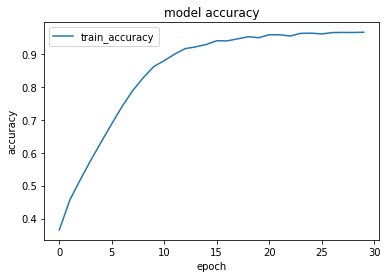

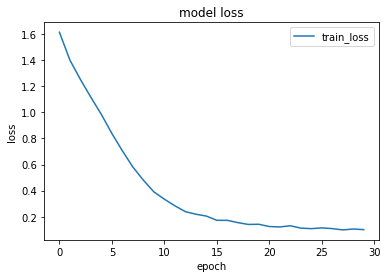

In [15]:
# Plot the model loss of the training data
print(history.history.keys())

#  "Training Accuracy"
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'])
plt.show()

#"Training Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print("Performance Metrics: ")
metrics=classification_report(test_labels,y_pred)
print(metrics)
print("Confusion Matrix: ")
CM=confusion_matrix(test_labels,y_pred)
print(CM)

Performance Metrics: 
              precision    recall  f1-score   support

           0       0.37      0.37      0.37       958
           1       0.46      0.42      0.44       111
           2       0.35      0.38      0.36      1024
           3       0.68      0.66      0.67      1774
           4       0.37      0.34      0.35      1247
           5       0.61      0.65      0.63       831
           6       0.41      0.40      0.40      1233

    accuracy                           0.48      7178
   macro avg       0.46      0.46      0.46      7178
weighted avg       0.48      0.48      0.48      7178

Confusion Matrix: 
[[ 354   17  145  116  159   42  125]
 [  16   47   15   10    9    3   11]
 [ 136   11  384   90  166  104  133]
 [ 101    6  110 1179  127   73  178]
 [ 179    9  191  132  425   63  248]
 [  35    3  115   50   47  543   38]
 [ 133   10  143  166  226   56  499]]


In [18]:
model.save("emotionRecog.h5")

In [20]:
model = keras.models.load_model("emotionRecog.h5")

In [21]:
y = model.predict(np.array(test_images))
print(y.shape)

y_pred = []
for l in y:
    y_pred.append(np.argmax(l))
print(np.array(y_pred))
print(test_labels)

(7178, 7)
[6 3 0 ... 0 0 2]
[0 1 4 ... 0 3 2]


In [90]:
tests = []
tests.append(test_images[10])
print(np.array(tests).shape)
print(np.array(tests))
y = model.predict(np.array(tests))
print(np.argmax(y))

(1, 48, 48, 1)
[[[[0.70588235]
   [0.68627451]
   [0.6627451 ]
   ...
   [0.87058824]
   [0.87843137]
   [0.89411765]]

  [[0.68627451]
   [0.6627451 ]
   [0.63921569]
   ...
   [0.85882353]
   [0.87058824]
   [0.89411765]]

  [[0.66666667]
   [0.63921569]
   [0.6       ]
   ...
   [0.85098039]
   [0.87058824]
   [0.89411765]]

  ...

  [[0.65098039]
   [0.65098039]
   [0.6627451 ]
   ...
   [0.49803922]
   [0.48627451]
   [0.47058824]]

  [[0.65098039]
   [0.65098039]
   [0.66666667]
   ...
   [0.16862745]
   [0.16470588]
   [0.16078431]]

  [[0.65490196]
   [0.65098039]
   [0.65490196]
   ...
   [0.1254902 ]
   [0.1254902 ]
   [0.12941176]]]]
3


(-0.5, 47.5, 47.5, -0.5)

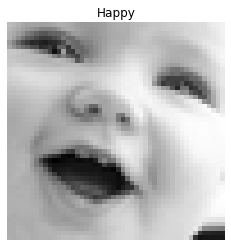

In [54]:
tests = np.array(tests).reshape(48,48)
plt.imshow(tests[0:], cmap='binary_r')
plt.title(emotions[np.argmax(y)])
plt.axis('off')

In [91]:
from tensorflow.keras.preprocessing import image
def load_image(img_path):
    img = image.load_img(img_path, target_size=(16, 48))
    img_tensor = image.img_to_array(img)            
    img_tensor = np.expand_dims(img_tensor, axis=0) 
    return img_tensor

In [94]:
tests = load_image("download.jpg")
tests = np.array(tests).reshape(-1)
tests = tests.reshape(1,48,48,1)
y =model.predict(tests)
print(np.argmax(y))

3


(-115.15, 2418.15, -12.75, 267.75)

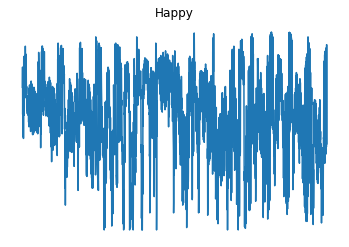

In [96]:
tests = np.array(tests).reshape(-1)
plt.plot(tests[0:])
plt.title(emotions[np.argmax(y)])
plt.axis('off')